In [17]:
# https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [40]:
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/NOVA_AI/Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [44]:
print(dataset.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [49]:
from sklearn.cluster import KMeans
X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
X_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

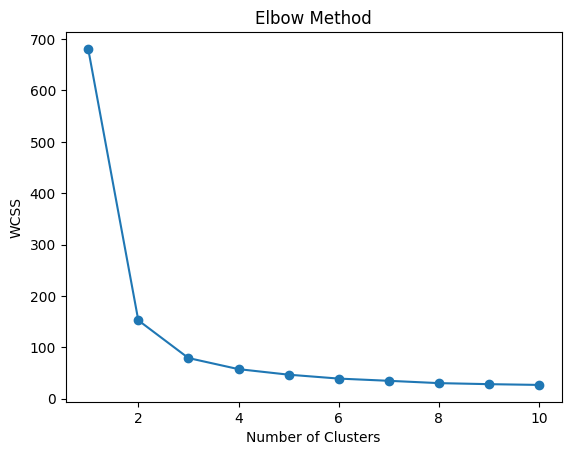

In [62]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [67]:
optimal_k=3

In [68]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [69]:
print("Inertia:", kmeans.inertia_)

Inertia: 140.96581663074699


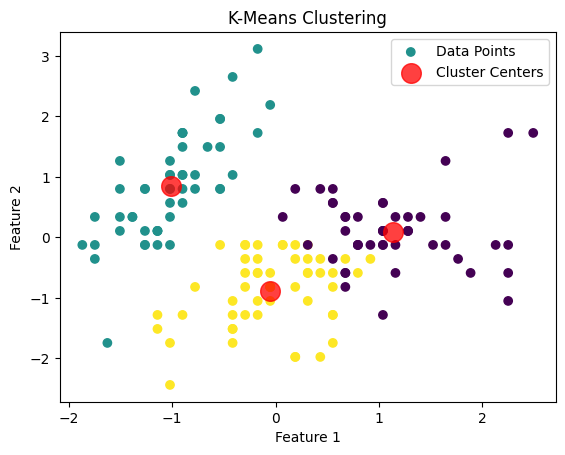

In [85]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', label='Data Points')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [73]:
predictions = kmeans.predict(X_scaled)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [75]:
dataset['Cluster'] = predictions
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


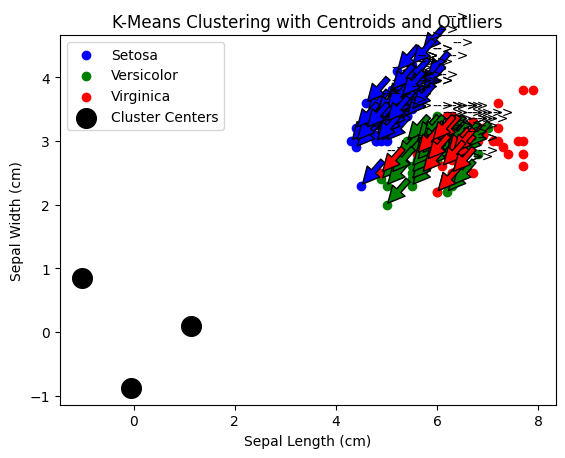

In [79]:
# Filter data by species
setosa_data = dataset[dataset['Species'] == 'Iris-setosa']
versicolor_data = dataset[dataset['Species'] == 'Iris-versicolor']
virginica_data = dataset[dataset['Species'] == 'Iris-virginica']

# Plotting the clusters
plt.scatter(setosa_data['SepalLengthCm'], setosa_data['SepalWidthCm'], color='blue', label='Setosa')
plt.scatter(versicolor_data['SepalLengthCm'], versicolor_data['SepalWidthCm'], color='green', label='Versicolor')
plt.scatter(virginica_data['SepalLengthCm'], virginica_data['SepalWidthCm'], color='red', label='Virginica')

# Plotting cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='o', label='Cluster Centers')

# Identifying outliers
outliers_setosa = setosa_data[predictions[setosa_data.index] != kmeans.predict(X.loc[setosa_data.index])]
outliers_versicolor = versicolor_data[predictions[versicolor_data.index] != kmeans.predict(X.loc[versicolor_data.index])]
outliers_virginica = virginica_data[predictions[virginica_data.index] != kmeans.predict(X.loc[virginica_data.index])]

# Plot outliers with arrows
for index, outlier in outliers_setosa.iterrows():
    plt.annotate('-->', xy=(outlier['SepalLengthCm'], outlier['SepalWidthCm']), xytext=(outlier['SepalLengthCm'] + 0.5, outlier['SepalWidthCm'] + 0.5),
                 arrowprops=dict(facecolor='blue', shrink=0.05))
for index, outlier in outliers_versicolor.iterrows():
    plt.annotate('-->', xy=(outlier['SepalLengthCm'], outlier['SepalWidthCm']), xytext=(outlier['SepalLengthCm'] + 0.5, outlier['SepalWidthCm'] + 0.5),
                 arrowprops=dict(facecolor='green', shrink=0.05))
for index, outlier in outliers_virginica.iterrows():
    plt.annotate('-->', xy=(outlier['SepalLengthCm'], outlier['SepalWidthCm']), xytext=(outlier['SepalLengthCm'] + 0.5, outlier['SepalWidthCm'] + 0.5),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering with Centroids and Outliers')
plt.legend()
plt.show()
